In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.size': 22})

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow

%load_ext autoreload
%autoreload 2


2.8.0
1.21.5


In [3]:

data = pd.read_csv('/content/bg_struct.csv')
X = data[['cell_length_a', 'cell_lentgh_b', 'cell_lentgh_c', 'cell_angle_alpha', 'cell_angle_beta', 'cell_angle_gamma']].values
Y = data[['bandgap']].values

In [98]:
seed = 12
# create test/train split from the data above and  keep 20% for testing
X_train_pn, X_test_pn, y_train, y_test = train_test_split(X, Y,
                                                         test_size=0.1, 
                                                         random_state=seed)
# train a standard scaler model to apply it to the train set and test set
X_train_scaler = StandardScaler().fit(X_train_pn)
X_train = X_train_scaler.transform(X_train_pn).astype(np.float32)
X_test = X_train_scaler.transform(X_test_pn).astype(np.float32)


In [99]:
import torch
import torch.nn as nn
import torch.nn.functional as F
x_data = torch.tensor(X_train)
y_data = torch.tensor(y_train.astype(np.float32))

x_val = torch.tensor(X_test)
y_val = torch.tensor(y_test.astype(np.float32))

In [138]:
class Net(nn.Module):
    def __init__(self, input_size):
      super(Net, self).__init__()
      self.fc1 = nn.Linear(input_size, 32)
      self.fc2 = nn.Linear(32, 16)
      self.fc3 = nn.Linear(16, 16)
      self.fc4 = nn.Linear(16, 1)       
      self.dropout1 = nn.Dropout(p=0.1)

    def forward(self, x):
      x = self.fc1(x)
      x = F.logsigmoid(x)#F.relu(x)
      x = self.fc2(x)
      x = self.fc3(x)
      x = F.relu(x)
      x = self.fc4(x)

      return x


In [139]:
my_nn = Net(6)
loss_fn = nn.MSELoss()
epoch_loss = []
model = my_nn
learning_rate = 0.02
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum=0.7)
for t in range(2000):
    y_pred = model(x_data)
    loss = loss_fn(y_pred, y_data)
    epoch_loss.append(loss.item())
    if t % 100 == 99:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


val_result = my_nn(x_val)
print("curr validation accuracy is=", str(1 - LA.norm(y_val-val_result)/LA.norm(y_val)))

99 0.1393709033727646
199 0.13919632136821747
299 0.13919632136821747
399 0.13919632136821747
499 0.13919632136821747
599 0.13919632136821747
699 0.13919632136821747
799 0.13919632136821747
899 0.13919632136821747
999 0.13919632136821747
1099 0.13919632136821747
1199 0.13919630646705627
1299 0.139212504029274
1399 0.13919635117053986
1499 0.13922296464443207
1599 0.13919632136821747
1699 0.13919633626937866
1799 0.13920500874519348
1899 0.1391972005367279
1999 0.13919632136821747
curr validation accuracy is= tensor(0.8475, grad_fn=<RsubBackward1>)


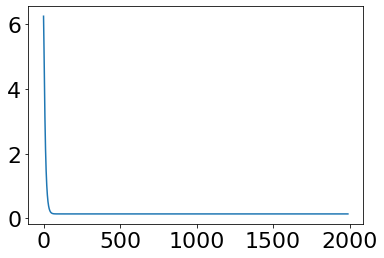

In [140]:
plt.plot(epoch_loss[10:])

In [50]:
from torch import linalg as LA


tensor(98.9737)

In [51]:
loss_fn(y_val, torch.zeros_like(y_val))

tensor(5.9950)